## Predicting Insurance
### Soumyadip Payra
### CSE A
### Roll 197178

### Import Libraries

In [145]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [146]:
data = pd.read_csv("insurance_data.csv")
data

,age,Affordability,bought_insurance
0,22,1,0
1,25,1,0
2,47,0,1
3,52,1,0
4,46,1,1
5,56,0,1
6,55,1,0
7,60,1,1
8,62,1,1
9,61,1,1


In [147]:
independent_col = ["age","Affordability"]
x = torch.tensor(data[independent_col].to_numpy(),dtype = torch.float64)
x.shape

torch.Size([27, 2])

In [148]:
dependent_col = ["bought_insurance"]
y = torch.tensor(data[dependent_col].to_numpy(),dtype = torch.float64)
y.shape

torch.Size([27, 1])

### Feature Scaling

In [149]:
x_scaled = x[:,:]
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:,1] = x[:,1]
x_scaled = torch.tensor(x_scaled,dtype = torch.float64)
x_scaled.shape

torch.Size([27, 2])

In [150]:
train_x,test_x,train_y,test_y = train_test_split(x_scaled,y,test_size=0.3)


In [151]:
print("Size of train_x : {}".format(train_x.shape))
print("Size of train_y : {}".format(train_y.shape))
print("Size of test_x : {}".format(test_x.shape))
print("Size of test_y : {}".format(test_y.shape))

Size of train_x : torch.Size([18, 2])
Size of train_y : torch.Size([18, 1])
Size of test_x : torch.Size([9, 2])
Size of test_y : torch.Size([9, 1])


### Building Models

In [159]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 16) 
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16,1)
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(16)
        self.batchnorm2 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x


net = Net()

In [160]:
y_pred = net(train_x.float())
y_pred

tensor([[0.3545],
        [0.4194],
        [0.3185],
        [0.3972],
        [0.4540],
        [0.4093],
        [0.5024],
        [0.4606],
        [0.5234],
        [0.4766],
        [0.4905],
        [0.4819],
        [0.4872],
        [0.4771],
        [0.4949],
        [0.4624],
        [0.3613],
        [0.4767]], grad_fn=<SigmoidBackward0>)

### Loss Function

In [161]:
loss_fn = nn.BCEWithLogitsLoss()
loss = loss_fn(y_pred,train_y)
loss

tensor(0.6819, dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

### Training the NEural Net

### with RMSprop

In [165]:
epochs = 500
optimizer = torch.optim.RMSprop(net.parameters(),lr=0.01)
Losses = []
Accuracy = []

In [166]:
for epoch in range(1,epochs+1):
    pred_y = net(train_x.float())
    epoch_loss = loss_fn(pred_y,train_y)
    Losses.append(epoch_loss.detach().numpy())
    pred_y_round = torch.round(pred_y)
    Acc = (pred_y_round == train_y).sum().float()/train_y.shape[0]
    Accuracy.append(Acc)
    
    optimizer.zero_grad()
    epoch_loss.backward()
    optimizer.step()
    print("Epoch : {} \t| loss : {} \t| accuracy : {}".format(epoch,epoch_loss,Acc))

Epoch : 1 	| loss : 0.6078592606095804 	| accuracy : 0.8888888955116272
Epoch : 2 	| loss : 0.5603293678723276 	| accuracy : 0.8888888955116272
Epoch : 3 	| loss : 0.5603763606318756 	| accuracy : 0.8888888955116272
Epoch : 4 	| loss : 0.5513156649888439 	| accuracy : 0.8888888955116272
Epoch : 5 	| loss : 0.5504482098269187 	| accuracy : 0.8888888955116272
Epoch : 6 	| loss : 0.5508003111472561 	| accuracy : 0.8888888955116272
Epoch : 7 	| loss : 0.5544243874755392 	| accuracy : 0.8888888955116272
Epoch : 8 	| loss : 0.5541678572154473 	| accuracy : 0.8888888955116272
Epoch : 9 	| loss : 0.5509915420656171 	| accuracy : 0.8888888955116272
Epoch : 10 	| loss : 0.5512809536423879 	| accuracy : 0.8888888955116272
Epoch : 11 	| loss : 0.5511123665139076 	| accuracy : 0.8888888955116272
Epoch : 12 	| loss : 0.550901478513616 	| accuracy : 0.8888888955116272
Epoch : 13 	| loss : 0.5500300593319367 	| accuracy : 0.8888888955116272
Epoch : 14 	| loss : 0.5513595608751894 	| accuracy : 0.88888

Epoch : 138 	| loss : 0.5422818190548067 	| accuracy : 0.8888888955116272
Epoch : 139 	| loss : 0.527089251804624 	| accuracy : 0.9444444179534912
Epoch : 140 	| loss : 0.5409305476480128 	| accuracy : 0.8888888955116272
Epoch : 141 	| loss : 0.5435970251439421 	| accuracy : 0.8888888955116272
Epoch : 142 	| loss : 0.5168987622250044 	| accuracy : 0.9444444179534912
Epoch : 143 	| loss : 0.528942672858133 	| accuracy : 0.8888888955116272
Epoch : 144 	| loss : 0.5384883317778635 	| accuracy : 0.8888888955116272
Epoch : 145 	| loss : 0.5360194880972041 	| accuracy : 0.8888888955116272
Epoch : 146 	| loss : 0.538156694856157 	| accuracy : 0.8888888955116272
Epoch : 147 	| loss : 0.534396039968434 	| accuracy : 0.8888888955116272
Epoch : 148 	| loss : 0.5325132220771818 	| accuracy : 0.8888888955116272
Epoch : 149 	| loss : 0.5426425809966567 	| accuracy : 0.8888888955116272
Epoch : 150 	| loss : 0.5060917824329696 	| accuracy : 1.0
Epoch : 151 	| loss : 0.5271054094571692 	| accuracy : 0.

Epoch : 280 	| loss : 0.530875239107344 	| accuracy : 0.8888888955116272
Epoch : 281 	| loss : 0.5219950402776816 	| accuracy : 0.9444444179534912
Epoch : 282 	| loss : 0.5451030582392712 	| accuracy : 0.7777777910232544
Epoch : 283 	| loss : 0.5174483665161662 	| accuracy : 0.8888888955116272
Epoch : 284 	| loss : 0.5248221142424484 	| accuracy : 0.8888888955116272
Epoch : 285 	| loss : 0.5264473524358557 	| accuracy : 0.8888888955116272
Epoch : 286 	| loss : 0.5218732919962341 	| accuracy : 0.8888888955116272
Epoch : 287 	| loss : 0.5360327656659487 	| accuracy : 0.8888888955116272
Epoch : 288 	| loss : 0.5269688790043197 	| accuracy : 0.8888888955116272
Epoch : 289 	| loss : 0.5367795085055858 	| accuracy : 0.8888888955116272
Epoch : 290 	| loss : 0.5178622578581225 	| accuracy : 0.9444444179534912
Epoch : 291 	| loss : 0.5282660656505169 	| accuracy : 0.8888888955116272
Epoch : 292 	| loss : 0.5138335708114836 	| accuracy : 1.0
Epoch : 293 	| loss : 0.5352312285039176 	| accuracy :

Epoch : 426 	| loss : 0.5348551236093044 	| accuracy : 0.8888888955116272
Epoch : 427 	| loss : 0.5194006516307949 	| accuracy : 0.9444444179534912
Epoch : 428 	| loss : 0.5193101072477372 	| accuracy : 0.9444444179534912
Epoch : 429 	| loss : 0.5291261118617432 	| accuracy : 0.8888888955116272
Epoch : 430 	| loss : 0.5238113179803099 	| accuracy : 0.9444444179534912
Epoch : 431 	| loss : 0.5374521157807775 	| accuracy : 0.8888888955116272
Epoch : 432 	| loss : 0.5257426189879576 	| accuracy : 0.9444444179534912
Epoch : 433 	| loss : 0.5194888040423393 	| accuracy : 0.9444444179534912
Epoch : 434 	| loss : 0.5229906423242839 	| accuracy : 0.9444444179534912
Epoch : 435 	| loss : 0.5193960662517283 	| accuracy : 0.9444444179534912
Epoch : 436 	| loss : 0.5315981899918341 	| accuracy : 0.8888888955116272
Epoch : 437 	| loss : 0.5216294060621744 	| accuracy : 0.9444444179534912
Epoch : 438 	| loss : 0.5370205304733544 	| accuracy : 0.9444444179534912
Epoch : 439 	| loss : 0.52284872324931

### Testing Data

In [167]:
pred_y_test = torch.round(net(test_x.float()))
loss = loss_fn(pred_y_test,test_y)
Acc = (pred_y_test == test_y).sum().float()/test_y.shape[0]
print("On Testing Data ==> \t loss : {} \t| accuracy : {}".format(loss,Acc))

On Testing Data ==> 	 loss : 0.5665186742941538 	| accuracy : 0.8888888955116272


### Plotting

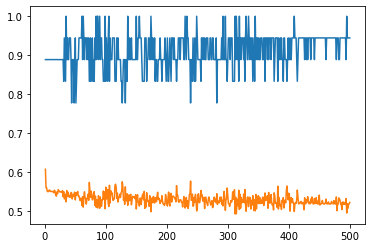

In [168]:
plt.plot(range(1,epochs+1),Accuracy)
plt.plot(range(1,epochs+1),Losses)

### with ADAgrad

In [170]:
net = Net()
epochs = 500
optimizer = torch.optim.Adagrad(net.parameters(),lr=0.01)
Losses = []
Accuracy = []

In [171]:
for epoch in range(1,epochs+1):
    pred_y = net(train_x.float())
    epoch_loss = loss_fn(pred_y,train_y)
    Losses.append(epoch_loss.detach().numpy())
    pred_y_round = torch.round(pred_y)
    Acc = (pred_y_round == train_y).sum().float()/train_y.shape[0]
    Accuracy.append(Acc)
    
    optimizer.zero_grad()
    epoch_loss.backward()
    optimizer.step()
    print("Epoch : {} \t| loss : {} \t| accuracy : {}".format(epoch,epoch_loss,Acc))

Epoch : 1 	| loss : 0.6936604877312978 	| accuracy : 0.5
Epoch : 2 	| loss : 0.6660049508015314 	| accuracy : 0.7222222089767456
Epoch : 3 	| loss : 0.6651286027497716 	| accuracy : 0.5555555820465088
Epoch : 4 	| loss : 0.6409332561824057 	| accuracy : 0.6666666865348816
Epoch : 5 	| loss : 0.6327847846680217 	| accuracy : 0.7222222089767456
Epoch : 6 	| loss : 0.6238879731131924 	| accuracy : 0.7777777910232544
Epoch : 7 	| loss : 0.6143967513408926 	| accuracy : 0.8333333134651184
Epoch : 8 	| loss : 0.6002136506140232 	| accuracy : 0.7222222089767456
Epoch : 9 	| loss : 0.5957115553319454 	| accuracy : 0.8888888955116272
Epoch : 10 	| loss : 0.6132059091081222 	| accuracy : 0.7222222089767456
Epoch : 11 	| loss : 0.5973875241147147 	| accuracy : 0.7777777910232544
Epoch : 12 	| loss : 0.5958104862107171 	| accuracy : 0.8333333134651184
Epoch : 13 	| loss : 0.5954250092100766 	| accuracy : 0.7777777910232544
Epoch : 14 	| loss : 0.5961030044903358 	| accuracy : 0.8333333134651184
Ep

Epoch : 134 	| loss : 0.5449230707276406 	| accuracy : 0.8888888955116272
Epoch : 135 	| loss : 0.5478323961061606 	| accuracy : 0.8888888955116272
Epoch : 136 	| loss : 0.5551521407614928 	| accuracy : 0.8888888955116272
Epoch : 137 	| loss : 0.5496602252678713 	| accuracy : 0.8888888955116272
Epoch : 138 	| loss : 0.5576423228825055 	| accuracy : 0.8888888955116272
Epoch : 139 	| loss : 0.55366590575674 	| accuracy : 0.8888888955116272
Epoch : 140 	| loss : 0.5476805467494867 	| accuracy : 0.8888888955116272
Epoch : 141 	| loss : 0.5453674553848233 	| accuracy : 0.8888888955116272
Epoch : 142 	| loss : 0.5352215303367606 	| accuracy : 0.9444444179534912
Epoch : 143 	| loss : 0.5498294543180641 	| accuracy : 0.8888888955116272
Epoch : 144 	| loss : 0.5474874438825483 	| accuracy : 0.8888888955116272
Epoch : 145 	| loss : 0.5538373642096607 	| accuracy : 0.8888888955116272
Epoch : 146 	| loss : 0.5427663602984265 	| accuracy : 0.8888888955116272
Epoch : 147 	| loss : 0.5327115645114746

Epoch : 277 	| loss : 0.5470137854459204 	| accuracy : 0.8333333134651184
Epoch : 278 	| loss : 0.550245112547499 	| accuracy : 0.8333333134651184
Epoch : 279 	| loss : 0.5683842871609764 	| accuracy : 0.8333333134651184
Epoch : 280 	| loss : 0.5434949288747803 	| accuracy : 0.8888888955116272
Epoch : 281 	| loss : 0.5427128364232582 	| accuracy : 0.8333333134651184
Epoch : 282 	| loss : 0.5348131098018913 	| accuracy : 0.9444444179534912
Epoch : 283 	| loss : 0.5442902391955108 	| accuracy : 0.8333333134651184
Epoch : 284 	| loss : 0.5565237458734676 	| accuracy : 0.8888888955116272
Epoch : 285 	| loss : 0.5390286829198077 	| accuracy : 0.8888888955116272
Epoch : 286 	| loss : 0.5359953836984156 	| accuracy : 0.8888888955116272
Epoch : 287 	| loss : 0.5510100308464543 	| accuracy : 0.8888888955116272
Epoch : 288 	| loss : 0.5476387911617672 	| accuracy : 0.8333333134651184
Epoch : 289 	| loss : 0.5399530907169618 	| accuracy : 0.8888888955116272
Epoch : 290 	| loss : 0.545273720190178

Epoch : 411 	| loss : 0.5453500771110763 	| accuracy : 0.8333333134651184
Epoch : 412 	| loss : 0.5224159798017354 	| accuracy : 0.9444444179534912
Epoch : 413 	| loss : 0.5271608967098776 	| accuracy : 0.9444444179534912
Epoch : 414 	| loss : 0.5450510381968141 	| accuracy : 0.8888888955116272
Epoch : 415 	| loss : 0.538924304714884 	| accuracy : 0.8888888955116272
Epoch : 416 	| loss : 0.5100525274690679 	| accuracy : 0.9444444179534912
Epoch : 417 	| loss : 0.5518930208307009 	| accuracy : 0.7777777910232544
Epoch : 418 	| loss : 0.5315669562274302 	| accuracy : 0.8888888955116272
Epoch : 419 	| loss : 0.5209895362341841 	| accuracy : 1.0
Epoch : 420 	| loss : 0.5565382960876377 	| accuracy : 0.8333333134651184
Epoch : 421 	| loss : 0.5348598821505625 	| accuracy : 0.9444444179534912
Epoch : 422 	| loss : 0.5416403139677944 	| accuracy : 0.8333333134651184
Epoch : 423 	| loss : 0.525340098487858 	| accuracy : 0.9444444179534912
Epoch : 424 	| loss : 0.5147875126878918 	| accuracy : 

In [172]:
pred_y_test = torch.round(net(test_x.float()))
loss = loss_fn(pred_y_test,test_y)
Acc = (pred_y_test == test_y).sum().float()/test_y.shape[0]
print("On Testing Data ==> \t loss : {} \t| accuracy : {}".format(loss,Acc))

On Testing Data ==> 	 loss : 0.7043218910694122 	| accuracy : 0.6666666865348816


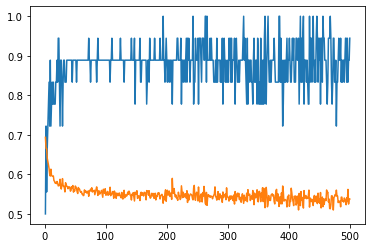

In [173]:
plt.plot(range(1,epochs+1),Accuracy)
plt.plot(range(1,epochs+1),Losses)

### SGD

In [174]:
net = Net()
epochs = 500
optimizer = torch.optim.Adagrad(net.parameters(),lr=0.01)
Losses = []
Accuracy = []

In [175]:
for epoch in range(1,epochs+1):
    pred_y = net(train_x.float())
    epoch_loss = loss_fn(pred_y,train_y)
    Losses.append(epoch_loss.detach().numpy())
    pred_y_round = torch.round(pred_y)
    Acc = (pred_y_round == train_y).sum().float()/train_y.shape[0]
    Accuracy.append(Acc)
    
    optimizer.zero_grad()
    epoch_loss.backward()
    optimizer.step()
    print("Epoch : {} \t| loss : {} \t| accuracy : {}".format(epoch,epoch_loss,Acc))

Epoch : 1 	| loss : 0.6917035430669785 	| accuracy : 0.4444444477558136
Epoch : 2 	| loss : 0.6706008480654823 	| accuracy : 0.6111111044883728
Epoch : 3 	| loss : 0.657405373122957 	| accuracy : 0.7222222089767456
Epoch : 4 	| loss : 0.6493501890864637 	| accuracy : 0.6111111044883728
Epoch : 5 	| loss : 0.6333193000819948 	| accuracy : 0.7777777910232544
Epoch : 6 	| loss : 0.6378789676560296 	| accuracy : 0.6666666865348816
Epoch : 7 	| loss : 0.6308064688411024 	| accuracy : 0.7222222089767456
Epoch : 8 	| loss : 0.6232289831257529 	| accuracy : 0.8888888955116272
Epoch : 9 	| loss : 0.6160723175853491 	| accuracy : 0.8888888955116272
Epoch : 10 	| loss : 0.6131366762436099 	| accuracy : 0.8333333134651184
Epoch : 11 	| loss : 0.6058366155872742 	| accuracy : 0.8888888955116272
Epoch : 12 	| loss : 0.6032481810284985 	| accuracy : 0.8888888955116272
Epoch : 13 	| loss : 0.5988896757157313 	| accuracy : 0.8333333134651184
Epoch : 14 	| loss : 0.6126530850306153 	| accuracy : 0.72222

Epoch : 124 	| loss : 0.5369454391831014 	| accuracy : 0.8888888955116272
Epoch : 125 	| loss : 0.5519315306866903 	| accuracy : 0.8888888955116272
Epoch : 126 	| loss : 0.5518976872618724 	| accuracy : 0.8888888955116272
Epoch : 127 	| loss : 0.5453739450199969 	| accuracy : 0.8888888955116272
Epoch : 128 	| loss : 0.5551924113436447 	| accuracy : 0.8888888955116272
Epoch : 129 	| loss : 0.5499936322630674 	| accuracy : 0.8888888955116272
Epoch : 130 	| loss : 0.5487807860158177 	| accuracy : 0.8888888955116272
Epoch : 131 	| loss : 0.5513034991777709 	| accuracy : 0.8888888955116272
Epoch : 132 	| loss : 0.5775323143401087 	| accuracy : 0.8333333134651184
Epoch : 133 	| loss : 0.5457811211462185 	| accuracy : 0.8888888955116272
Epoch : 134 	| loss : 0.5599951252467387 	| accuracy : 0.8888888955116272
Epoch : 135 	| loss : 0.5540639283426572 	| accuracy : 0.8333333134651184
Epoch : 136 	| loss : 0.5456821070539364 	| accuracy : 0.8888888955116272
Epoch : 137 	| loss : 0.53494755414107

Epoch : 258 	| loss : 0.5501713772351245 	| accuracy : 0.8888888955116272
Epoch : 259 	| loss : 0.5535456714116864 	| accuracy : 0.8888888955116272
Epoch : 260 	| loss : 0.5407527174172375 	| accuracy : 0.8888888955116272
Epoch : 261 	| loss : 0.5509986070414167 	| accuracy : 0.8888888955116272
Epoch : 262 	| loss : 0.5551608249754483 	| accuracy : 0.8888888955116272
Epoch : 263 	| loss : 0.5616791647545243 	| accuracy : 0.8888888955116272
Epoch : 264 	| loss : 0.5456176884270261 	| accuracy : 0.8333333134651184
Epoch : 265 	| loss : 0.5545464116395225 	| accuracy : 0.8888888955116272
Epoch : 266 	| loss : 0.5448749072254739 	| accuracy : 0.8888888955116272
Epoch : 267 	| loss : 0.5431424311365036 	| accuracy : 0.8888888955116272
Epoch : 268 	| loss : 0.5396939494611515 	| accuracy : 0.8888888955116272
Epoch : 269 	| loss : 0.5461494686478545 	| accuracy : 0.8888888955116272
Epoch : 270 	| loss : 0.5372361828647425 	| accuracy : 0.8888888955116272
Epoch : 271 	| loss : 0.55616223226348

Epoch : 392 	| loss : 0.5389143247847288 	| accuracy : 0.8888888955116272
Epoch : 393 	| loss : 0.5658057788205042 	| accuracy : 0.8888888955116272
Epoch : 394 	| loss : 0.548673322865347 	| accuracy : 0.8888888955116272
Epoch : 395 	| loss : 0.5425723241567337 	| accuracy : 0.8888888955116272
Epoch : 396 	| loss : 0.5524098201103761 	| accuracy : 0.8888888955116272
Epoch : 397 	| loss : 0.5382621272894741 	| accuracy : 0.8888888955116272
Epoch : 398 	| loss : 0.5384955351526849 	| accuracy : 0.8888888955116272
Epoch : 399 	| loss : 0.5553839204233858 	| accuracy : 0.8888888955116272
Epoch : 400 	| loss : 0.547513637286809 	| accuracy : 0.8888888955116272
Epoch : 401 	| loss : 0.5399507156798791 	| accuracy : 0.8888888955116272
Epoch : 402 	| loss : 0.5472394601364512 	| accuracy : 0.8888888955116272
Epoch : 403 	| loss : 0.5365513049577102 	| accuracy : 0.8888888955116272
Epoch : 404 	| loss : 0.5368455885369864 	| accuracy : 0.8888888955116272
Epoch : 405 	| loss : 0.5644228806752127

In [176]:
pred_y_test = torch.round(net(test_x.float()))
loss = loss_fn(pred_y_test,test_y)
Acc = (pred_y_test == test_y).sum().float()/test_y.shape[0]
print("On Testing Data ==> \t loss : {} \t| accuracy : {}".format(loss,Acc))

On Testing Data ==> 	 loss : 0.5665186742941538 	| accuracy : 0.8888888955116272


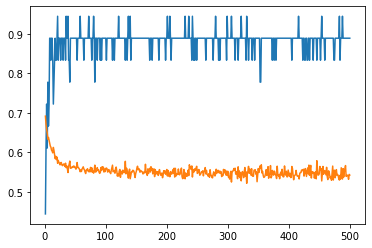

In [177]:
plt.plot(range(1,epochs+1),Accuracy)
plt.plot(range(1,epochs+1),Losses)

### Thank You